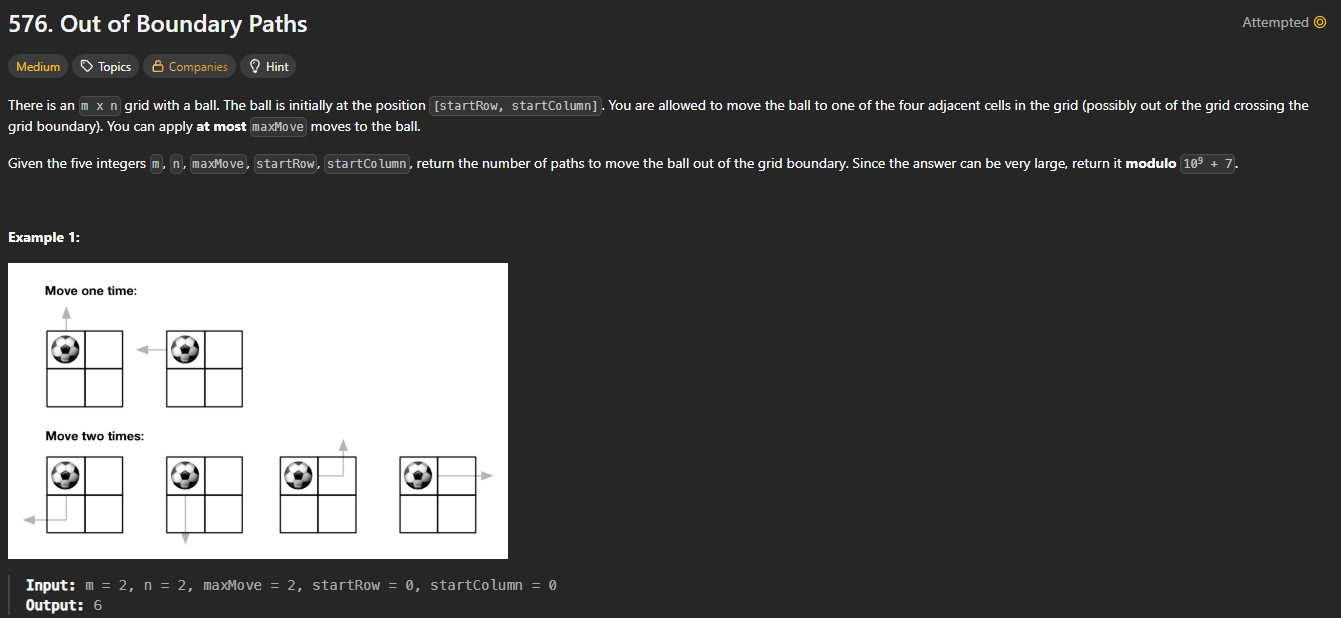

# Recursion

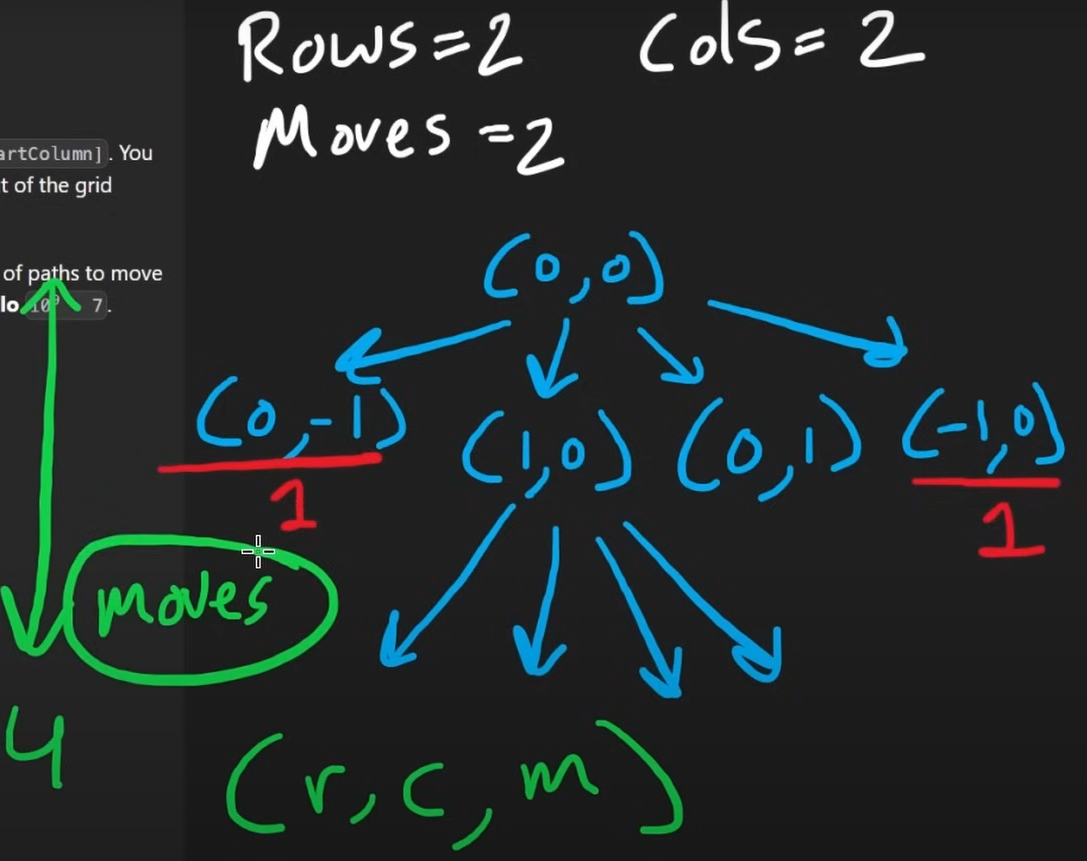

In [ ]:
class Solution:
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        ROWS, COLS = m, n
        MOD = 10**9 + 7

        def dfs(r, c, moves):
            if (r < 0 or r == ROWS or c < 0 or c == COLS):
                return 1
            if moves == 0:
                return 0

            return (
                (dfs(r + 1, c, moves - 1) +
                dfs(r - 1, c, moves - 1)) % MOD +
                (dfs(r, c + 1, moves - 1) +
                dfs(r, c - 1, moves - 1)) % MOD
            ) % MOD

        return dfs(startRow, startColumn, maxMove)

# Memoization

In [ ]:
class Solution:
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        ROWS, COLS = m, n
        MOD = 10**9 + 7
        memo = {}

        def dfs(r, c, moves):
            if (r < 0 or r == ROWS or c < 0 or c == COLS):
                return 1
            if moves == 0:
                return 0

            key = (r, c, moves)
            if key in memo:
                return memo[key]

            total = (
                (dfs(r + 1, c, moves - 1) +
                dfs(r - 1, c, moves - 1)) % MOD +
                (dfs(r, c + 1, moves - 1) +
                dfs(r, c - 1, moves - 1)) % MOD
            ) % MOD

            memo[key] = total
            return total

        return dfs(startRow, startColumn, maxMove)

# Dynamic Programming

In [ ]:
class Solution:
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        ROWS, COLS = m, n
        MOD = 10**9 + 7
        grid = [[0] * COLS for r in range(ROWS)]

        for m in range(1, maxMove + 1):
            tmp = [[0] * COLS for r in range(ROWS)]
            for r in range(ROWS):
                for c in range(COLS):
                    if r + 1 == ROWS:
                        tmp[r][c] = (tmp[r][c] + 1) % MOD
                    else:
                        tmp[r][c] = (tmp[r][c] + grid[r + 1][c]) % MOD
                    if r - 1 == -1:
                        tmp[r][c] = (tmp[r][c] + 1) % MOD
                    else:
                        tmp[r][c] = (tmp[r][c] + grid[r - 1][c]) % MOD
                    if c + 1 == COLS:
                        tmp[r][c] = (tmp[r][c] + 1) % MOD
                    else:
                        tmp[r][c] = (tmp[r][c] + grid[r][c + 1]) % MOD
                    if c - 1 == -1:
                        tmp[r][c] = (tmp[r][c] + 1) % MOD
                    else:
                        tmp[r][c] = (tmp[r][c] + grid[r][c - 1]) % MOD
            grid = tmp

        return grid[startRow][startColumn]
